In [1]:
from google.colab import files
uploaded = files.upload()

Saving co2.csv to co2.csv


In [2]:
# Import thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


In [3]:
# Hàm tạo dữ liệu dạng time series (tạo các feature trễ và target)
def create_timeseries_data(data, window_size):
    i = 1
    while i < window_size:
        data[f"co2_{i}"] = data["co2"].shift(-i)
        i += 1

    # Cột target chính là giá trị co2 sau window_size bước
    data["target"] = data["co2"].shift(-i)
    data = data.dropna(axis=0)
    return data


In [4]:
# Đọc file CSV và xử lý dữ liệu
data = pd.read_csv("co2.csv")
data["time"] = pd.to_datetime(data["time"], yearfirst=True)
data["co2"] = data["co2"].interpolate()  # nội suy giá trị thiếu

# Thiết lập tham số
window_size = 5
train_ratio = 0.8

# Tạo dữ liệu dạng time series
data = create_timeseries_data(data, window_size)

# Chia X (features) và y (target)
x = data.drop(["time", "target"], axis=1)
y = data["target"]

# Chia tập train/test theo tỉ lệ
num_samples = len(x)
x_train = x[:int(num_samples * train_ratio)]
y_train = y[:int(num_samples * train_ratio)]
x_test = x[int(num_samples * train_ratio):]
y_test = y[int(num_samples * train_ratio):]

print(f"Số lượng mẫu train: {len(x_train)}, test: {len(x_test)}")


Số lượng mẫu train: 1823, test: 456


In [5]:
# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

# Dự đoán trên tập test
y_predict = model.predict(x_test)

# Đánh giá mô hình
print("MAE:", mean_absolute_error(y_test, y_predict))
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:", root_mean_squared_error(y_test, y_predict))
print("R2:", r2_score(y_test, y_predict))


MAE: 0.3605603788359256
MSE: 0.22044947360346848
RMSE: 0.46952047197483143
R2: 0.9907505918201435


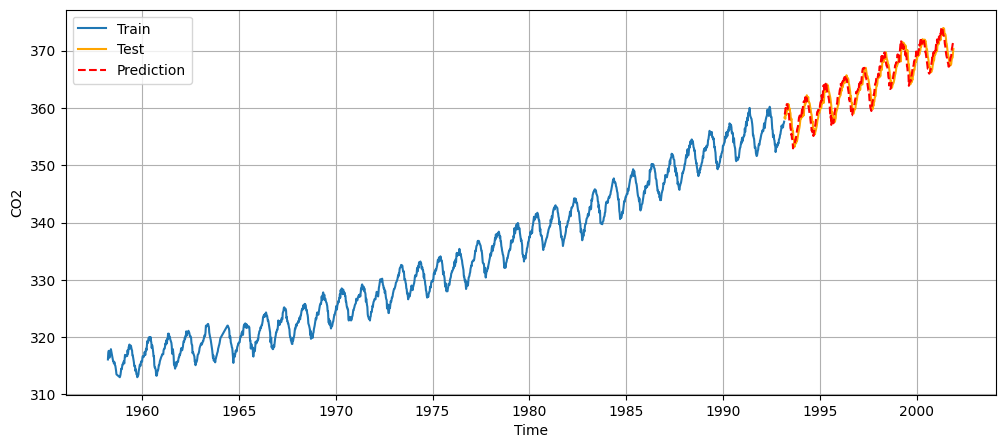

In [6]:
# Vẽ biểu đồ trực quan train / test / prediction
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data["time"][:int(num_samples*train_ratio)], data["co2"][:int(num_samples*train_ratio)], label="Train")
ax.plot(data["time"][int(num_samples*train_ratio):], data["co2"][int(num_samples*train_ratio):], label="Test", color="orange")
ax.plot(data["time"][int(num_samples*train_ratio):], y_predict, label="Prediction", color="red", linestyle="dashed")

ax.set_xlabel("Time")
ax.set_ylabel("CO2")
ax.grid()
ax.legend()
plt.show()


In [7]:
# Dự báo tiếp 10 bước dựa trên đầu vào ban đầu
input_data = [362, 362.3, 362.6, 363, 363.1]  # có thể thay bằng dữ liệu gần nhất
for _ in range(10):
    y_pred_next = model.predict([input_data])
    print(f"Input: {input_data} -> Prediction: {y_pred_next[0]:.4f}")
    input_data = input_data[1:] + y_pred_next.tolist()


Input: [362, 362.3, 362.6, 363, 363.1] -> Prediction: 363.2695
Input: [362.3, 362.6, 363, 363.1, 363.2694840573799] -> Prediction: 363.4316
Input: [362.6, 363, 363.1, 363.2694840573799, 363.43158150080063] -> Prediction: 363.5278
Input: [363, 363.1, 363.2694840573799, 363.43158150080063, 363.52780958087493] -> Prediction: 363.5918
Input: [363.1, 363.2694840573799, 363.43158150080063, 363.52780958087493, 363.59177474289896] -> Prediction: 363.6596
Input: [363.2694840573799, 363.43158150080063, 363.52780958087493, 363.59177474289896, 363.65957604475255] -> Prediction: 363.7017
Input: [363.43158150080063, 363.52780958087493, 363.59177474289896, 363.65957604475255, 363.7016606745825] -> Prediction: 363.7230
Input: [363.52780958087493, 363.59177474289896, 363.65957604475255, 363.7016606745825, 363.7230382478362] -> Prediction: 363.7374
Input: [363.59177474289896, 363.65957604475255, 363.7016606745825, 363.7230382478362, 363.7373700369358] -> Prediction: 363.7423
Input: [363.65957604475255, 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/